##Load the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ckd_data = pd.read_csv('/content/drive/MyDrive/Machine Learning Folder/chronic_kidney_disease_full.csv')
col_names = [ckd_data.columns]

df = ckd_data.copy()
ckd_data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [2]:
df.shape

(400, 25)

## Preprocessing

Check for missing values

In [3]:
missing = df.isnull().sum()
print(missing)

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64


In [4]:
categorical = [col for col, dtype in df.dtypes.items() if dtype == 'object']
numerical = [col for col, dtype in df.dtypes.items() if dtype != 'object']

Fill missing categorical values with the mode



In [5]:
def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

for col in categorical:
    impute_mode(col)

df[categorical].isnull().sum()

rbc      0
pc       0
pcc      0
ba       0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

Fill missing numerical values with the mean


In [6]:
def impute_mean(feature):
    mean = df[feature].mean()
    df[feature] = df[feature].fillna(mean)

for col in numerical:
    impute_mean(col)

df[categorical].isnull().sum()

rbc      0
pc       0
pcc      0
ba       0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

Replace words in the categorical column with binary (1 or 0)

In [7]:
replacement_mapping = {
    'normal': 1, 'abnormal': 0,
    'present': 1, 'notpresent': 0,
    'yes': 1, 'no': 0,
    'good': 1, 'poor': 0,
    'ckd': 1, 'notckd': 0
}

for column in categorical:
    df[column] = df[column].replace(replacement_mapping)

In [8]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.000000,...,44.0,7800.0,5.200000,1,1,0,1,0,0,1
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,148.036517,...,38.0,6000.0,4.707435,0,0,0,1,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,...,31.0,7500.0,4.707435,0,1,0,0,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,...,32.0,6700.0,3.900000,1,0,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,...,35.0,7300.0,4.600000,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.000000,...,47.0,6700.0,4.900000,0,0,0,1,0,0,0
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.000000,...,54.0,7800.0,6.200000,0,0,0,1,0,0,0
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.000000,...,49.0,6600.0,5.400000,0,0,0,1,0,0,0
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.000000,...,51.0,7200.0,5.900000,0,0,0,1,0,0,0


## Data Visualization

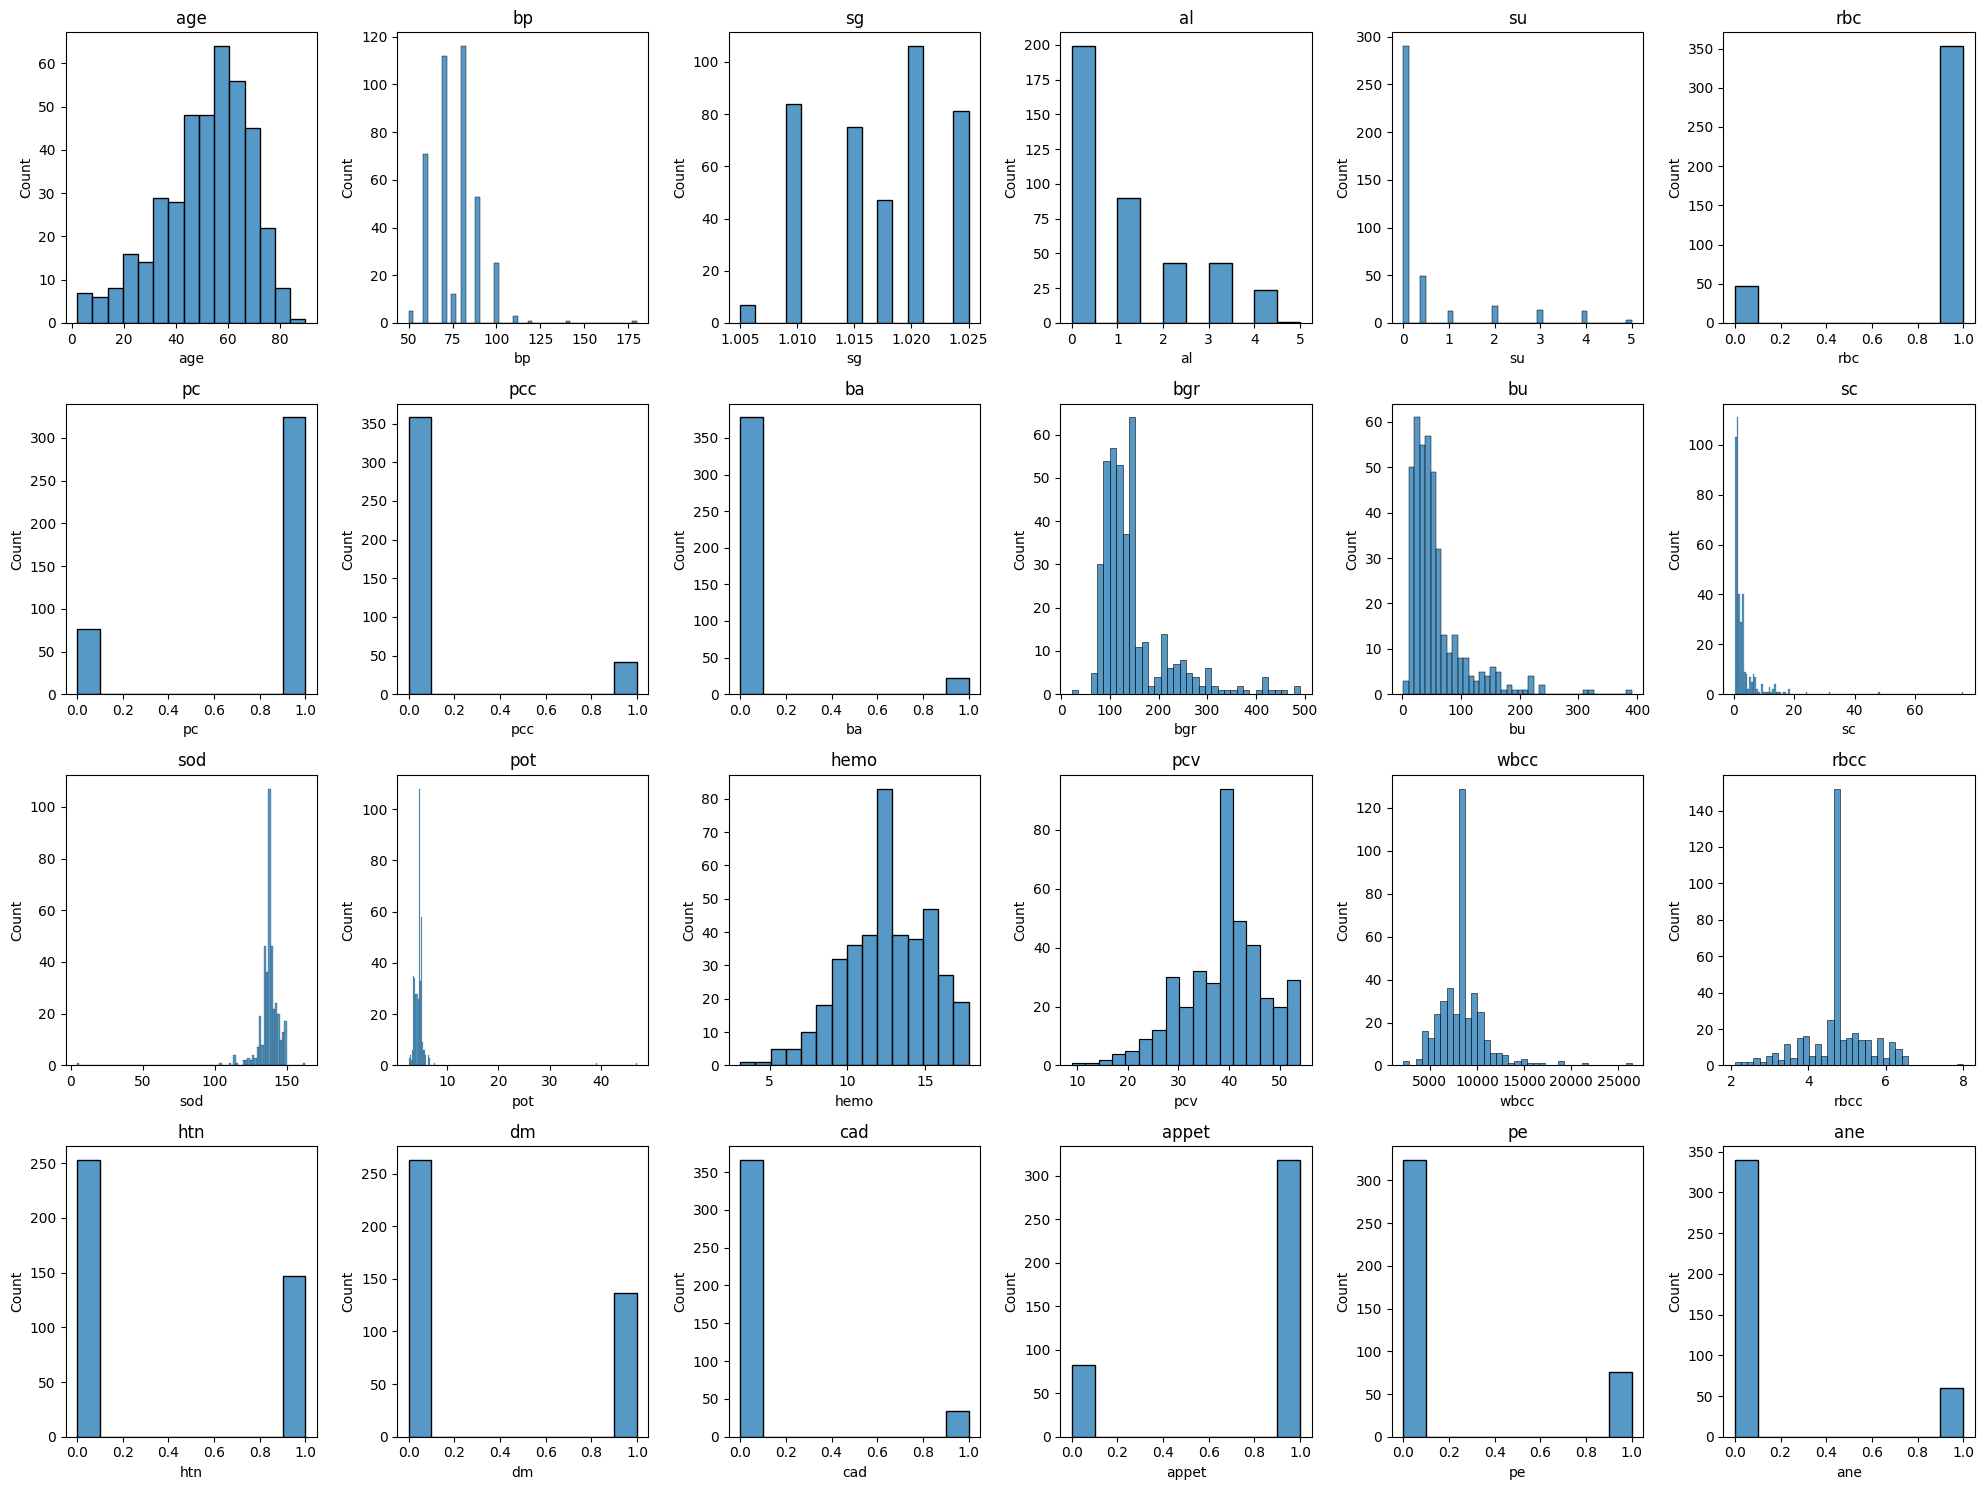

In [9]:
plots = 4 * 6
fig, axes = plt.subplots(4, 6, figsize=(20, 15))
axes = axes.flatten()

for i, columnName in enumerate(df.columns):
    if i < plots:
        sns.histplot(df[columnName], ax=axes[i])
        axes[i].set_title(columnName)

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Correlation Matrix Heatmap\nwith class')

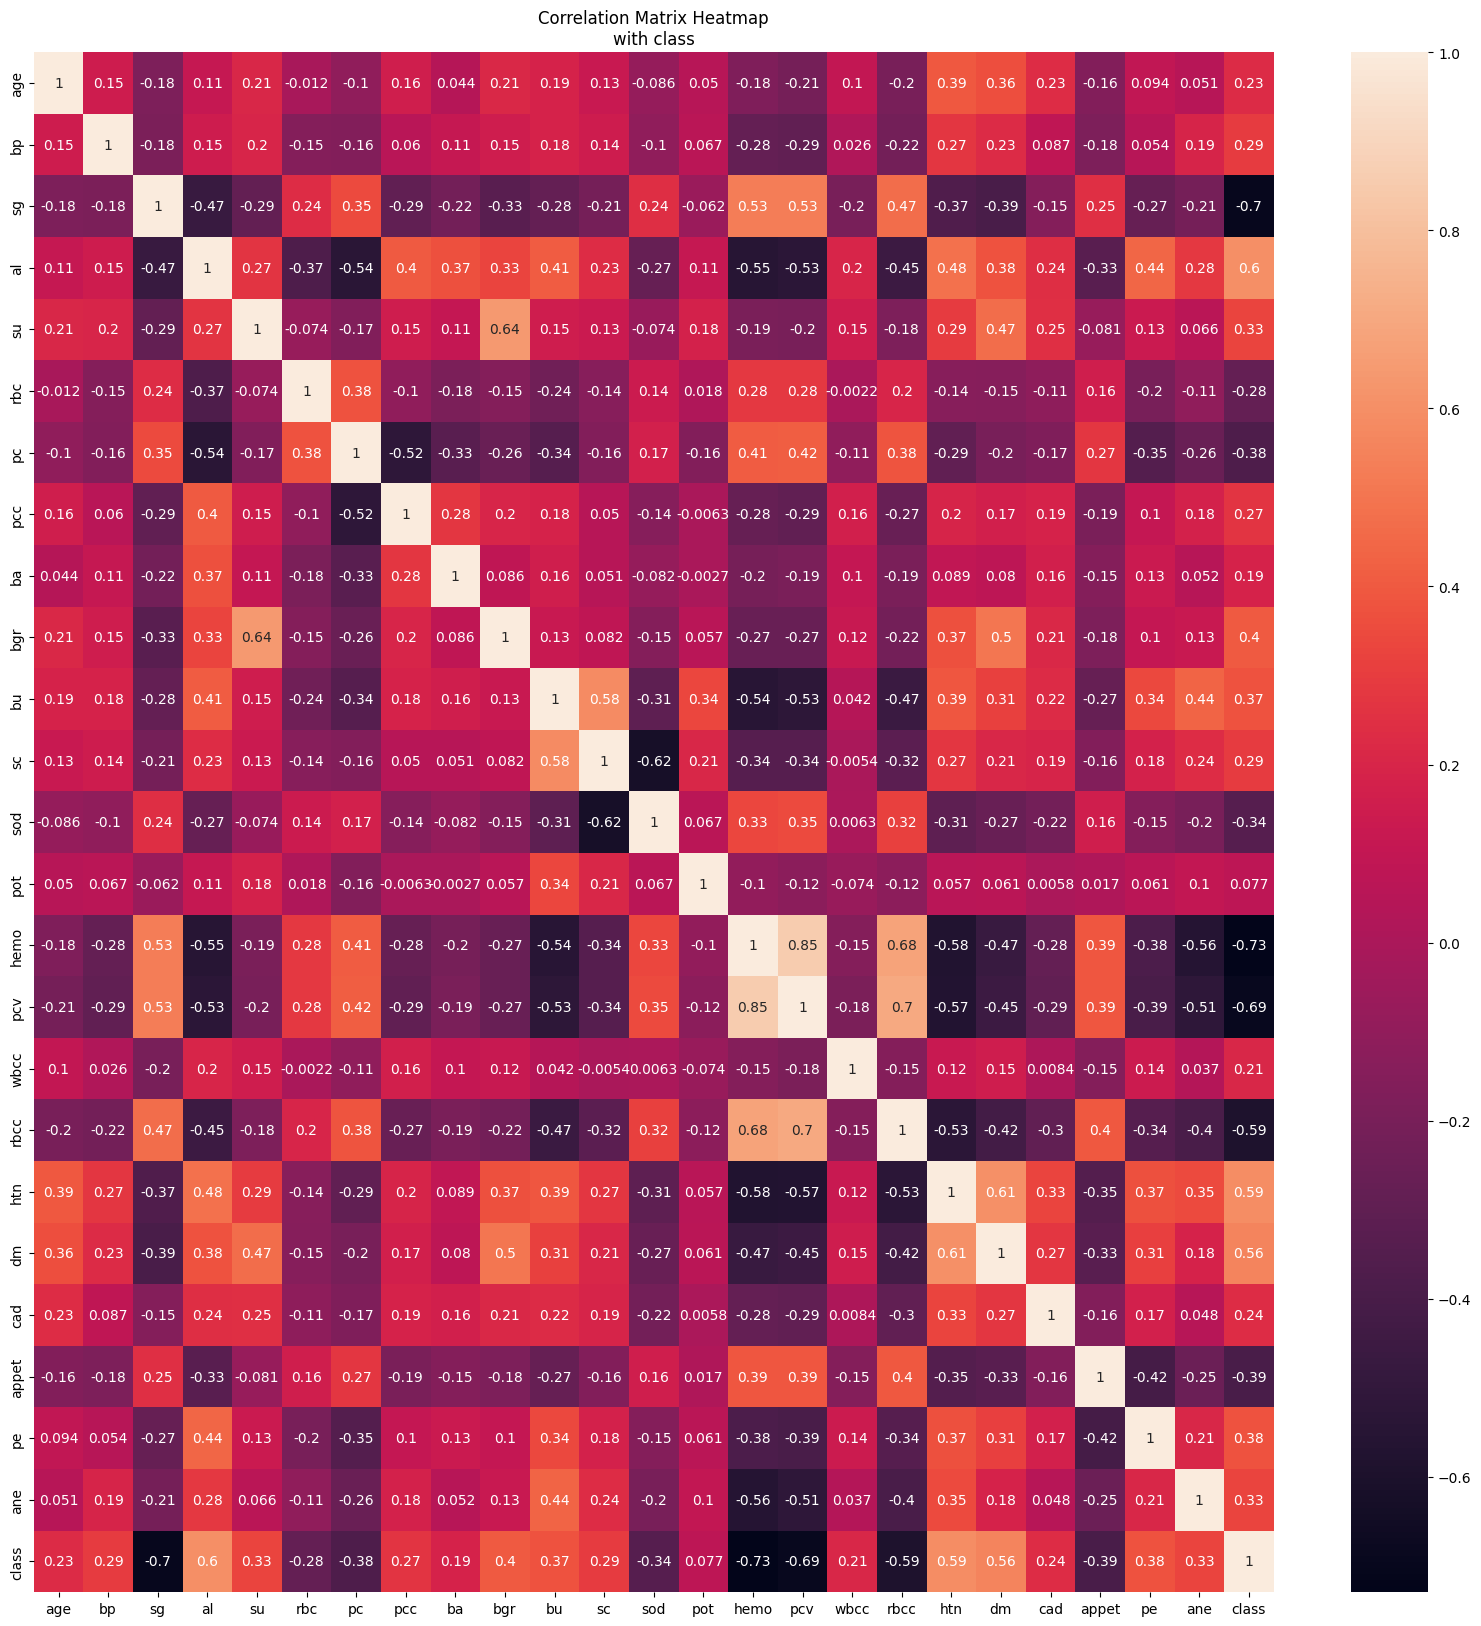

In [10]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), annot = True)
plt.title(f'Correlation Matrix Heatmap\nwith class')

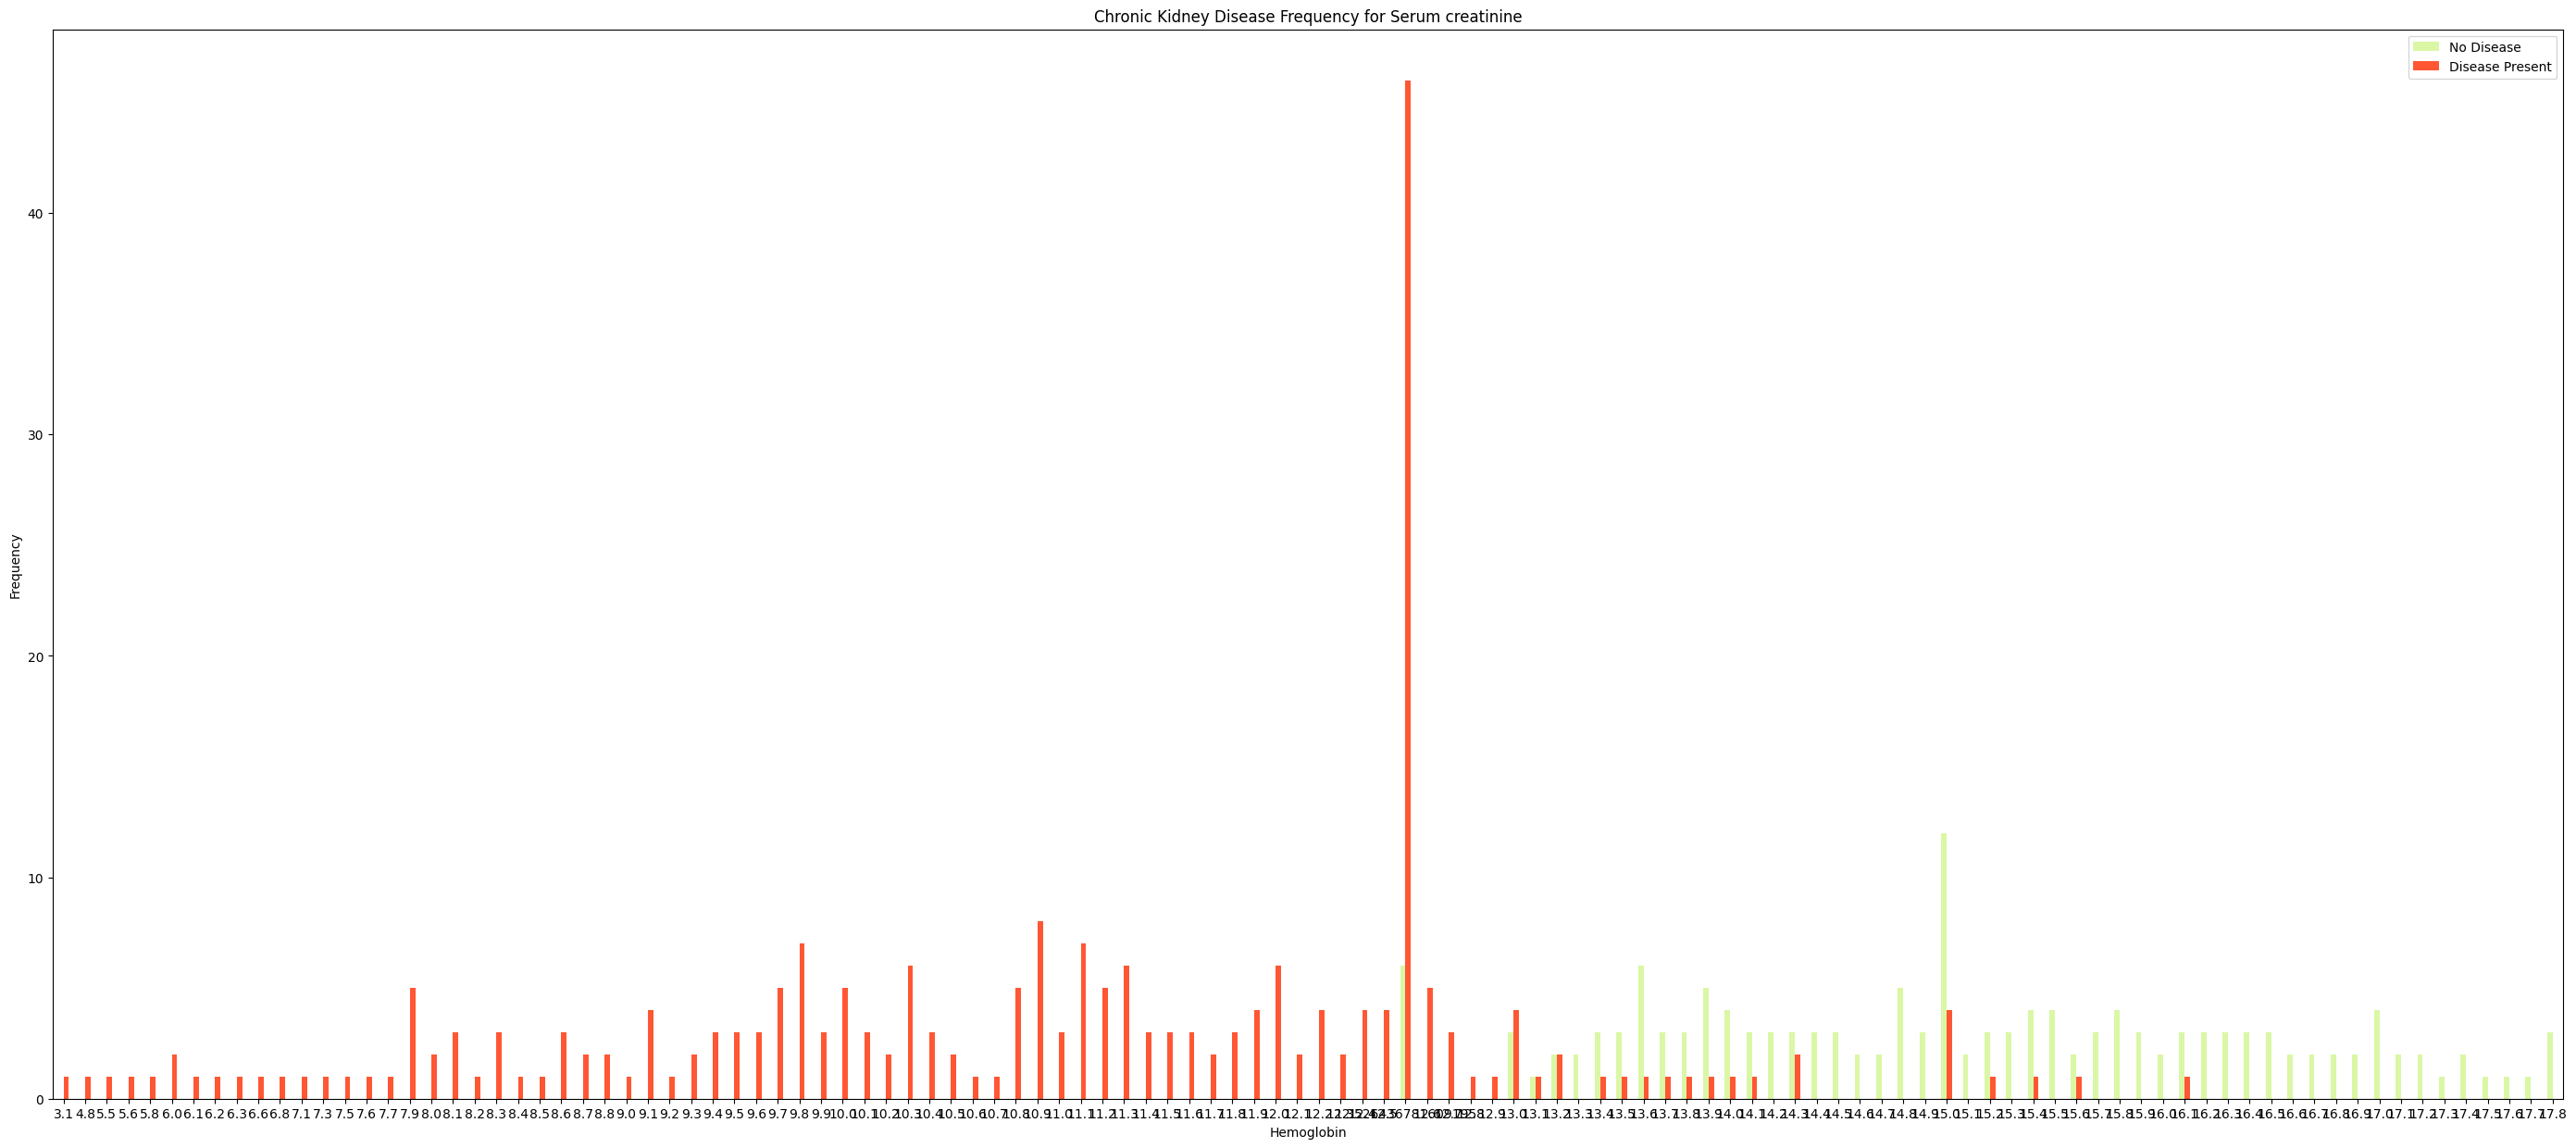

In [11]:
pd.crosstab(df['hemo'],df['class']).plot(kind="bar",figsize=(35,15),color=['#DAF7A6','#FF5733'])
plt.title('Chronic Kidney Disease Frequency for Serum creatinine')
plt.xlabel('Hemoglobin')
plt.xticks(rotation = 0)
plt.legend(["No Disease", "Disease Present"])
plt.ylabel('Frequency')
plt.show()

## Splitting The Dataset

In [12]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1]

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [16]:
y_pred_log = classifier.predict(X_test)

In [17]:
accuracy_log = accuracy_score(y_test, y_pred_log)
print(accuracy_log)

0.99


## K-Nearest Neighbors (KNN)

In [18]:
# search for an optimal value of K for KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

k_range = list(range(1, 31))
k_scores = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
  k_scores.append(scores.mean())

Text(0, 0.5, 'Cross-Validated Accuracy')

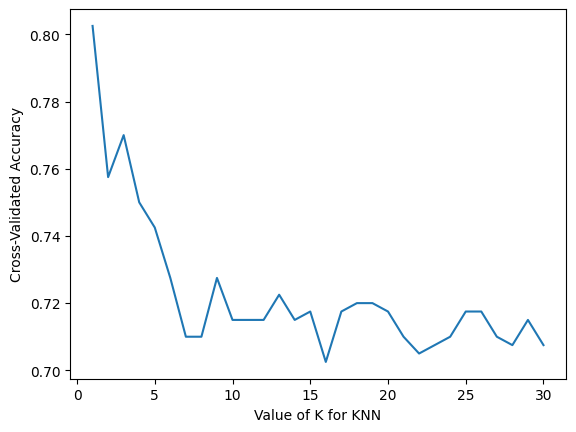

In [19]:
# pick the longest convergence point, because there is more k-values taken into consideration
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [20]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [21]:
y_pred_knn = knn.predict(X_test)

In [22]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(accuracy_knn)

0.99


## Decision Tree

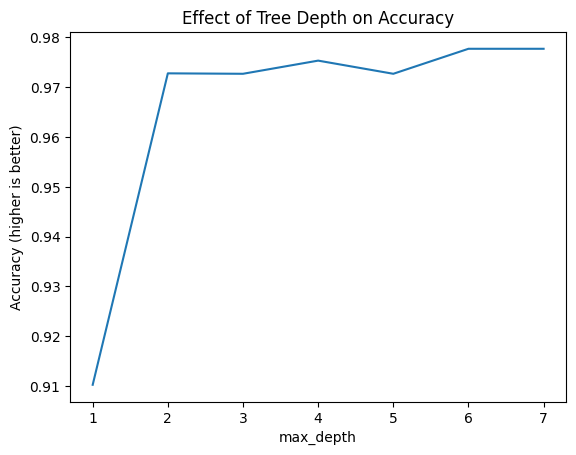

In [23]:
# check for best optimal max depth to use
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

max_depth_range = range(1, 8)
accuracy_scores = []

for depth in max_depth_range:
    temp_tree_clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    scores = cross_val_score(temp_tree_clf, X, y, cv=14, scoring='accuracy')  # Use 'accuracy' scoring
    accuracy_scores.append(np.mean(scores))

plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy (higher is better)')
plt.title('Effect of Tree Depth on Accuracy')
plt.show()

In [24]:
treeclf = DecisionTreeClassifier(max_depth=2, random_state=1)
treeclf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=1)

In [25]:
y_pred_decision_tree = treeclf.predict(X_test)

Visualize the tree

In [26]:
import graphviz
from sklearn.tree import export_graphviz

def viztree(decision_tree, feature_names):
  dot_data = export_graphviz(decision_tree, out_file=None, feature_names=feature_names,
  filled=True, rounded=True)
  return graphviz.Source(dot_data)

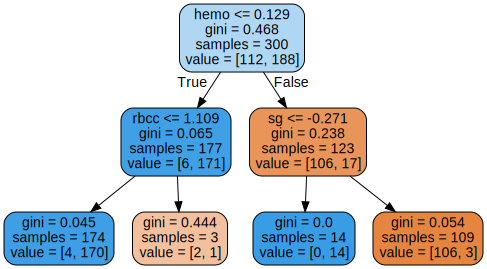

In [27]:
cols = list(df.columns)
cols.remove('class')
viztree(treeclf, feature_names=cols)

Feature Importance

In [28]:
pd.DataFrame({'feature': cols, 'importance': treeclf.feature_importances_}).sort_values(by='importance', ascending=False)

,feature,importance
14,hemo,0.793365
2,sg,0.187145
17,rbcc,0.019490
0,age,0.000000
13,pot,0.000000
22,pe,0.000000
21,appet,0.000000
20,cad,0.000000
19,dm,0.000000
18,htn,0.000000


In [29]:
accuracy_tree = accuracy_score(y_test, y_pred_decision_tree)
print(accuracy_tree)

1.0


## Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

random_forest_claasifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
random_forest_claasifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [31]:
y_pred_random_forest = random_forest_claasifier.predict(X_test)

In [32]:
accuracy_frst = accuracy_score(y_test, y_pred_random_forest)
print(accuracy_frst)

1.0


## Evaluation Metrics

Confusion Matrix

In [33]:
tn_log, fp_log, fn_log, tp_log = confusion_matrix(y_test, y_pred_log).ravel()
tn_knn, fp_knn, fn_knn, tp_knn = confusion_matrix(y_test, y_pred_knn).ravel()
tn_tree, fp_tree, fn_tree, tp_tree = confusion_matrix(y_test, y_pred_decision_tree).ravel()
tn_frst, fp_frst, fn_frst, tp_frst = confusion_matrix(y_test, y_pred_random_forest).ravel()

Accuracy

In [34]:
from sklearn import metrics

auc_log = metrics.roc_auc_score(y_test, y_pred_log)
auc_knn = metrics.roc_auc_score(y_test, y_pred_knn)
auc_tree = metrics.roc_auc_score(y_test, y_pred_decision_tree)
auc_frst = metrics.roc_auc_score(y_test, y_pred_random_forest)

Precision

In [35]:
precision_log = precision_score(y_test, y_pred_log)
precision_knn = precision_score(y_test, y_pred_knn)
precision_tree = precision_score(y_test, y_pred_decision_tree)
precision_frst = precision_score(y_test, y_pred_random_forest)

Visualising each metric in a dataframe

In [36]:
pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest'],
    'True Negative': [tn_log, tn_knn, tn_tree, tn_frst],
    'False Positive': [fp_log, fp_knn, fp_tree, fp_frst],
    'False Negative': [fn_log, fn_knn, fn_tree, fn_frst],
    'True Positive': [tp_log, tp_knn, tp_tree, tp_frst],
    'Accuracy': [accuracy_log*100, accuracy_knn*100, accuracy_tree*100, accuracy_frst*100],
    'AUC': [auc_log, auc_knn, auc_tree, auc_frst],
    'Precision': [precision_log, precision_knn, precision_tree, precision_frst],
})

,Model,True Negative,False Positive,False Negative,True Positive,Accuracy,AUC,Precision
0,Logistic Regression,38,0,1,61,99.0,0.991935,1.0
1,KNN,38,0,1,61,99.0,0.991935,1.0
2,Decision Tree,38,0,0,62,100.0,1.000000,1.0
3,Random Forest,38,0,0,62,100.0,1.000000,1.0
